In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

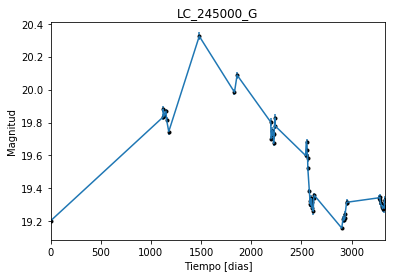

In [2]:
data = np.genfromtxt('LC_245000_G.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_245000_G')
plt.savefig("LC_245000_G.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

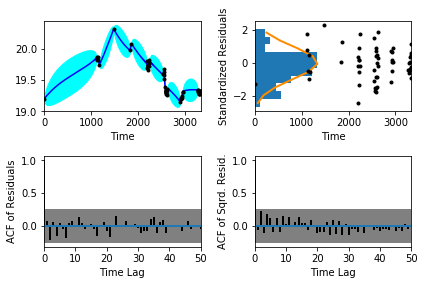

In [5]:
sample.assess_fit()

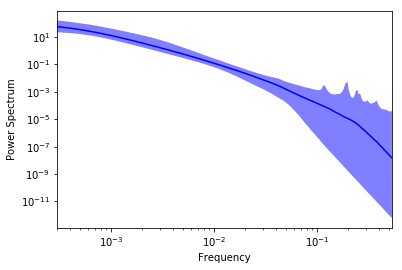

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

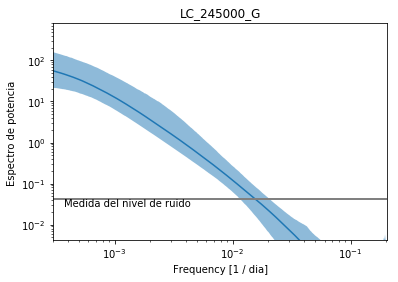

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_245000_G')
plt.savefig("Medida del nivel de ruido_G.pdf")


Text(0.5,1,'Prediccion , valor esperado LC_245000_G')

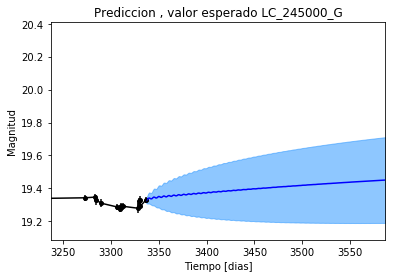

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_245000_G')

Text(0.5,1,'Prediccion, Caminos simulados_LC_245000_G')

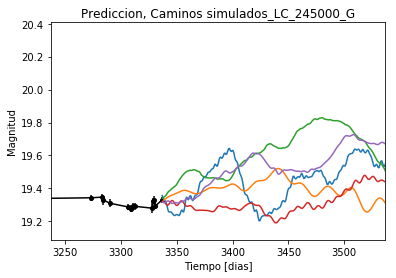

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_245000_G')

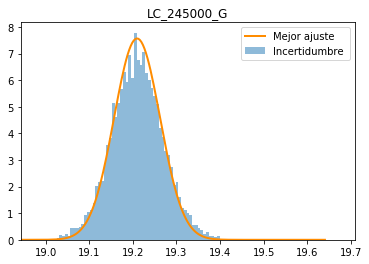

In [12]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_245000_G')
plt.savefig("Mejor_ajuste_LC_245000_G.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_245000_G')

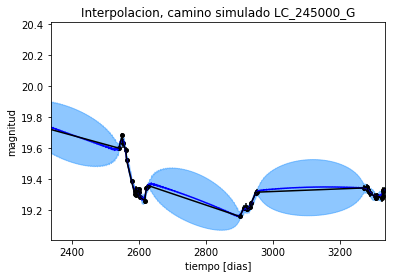

In [13]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_245000_G')

Text(0.5,1,'Interpolacion, camino simulado LC_245000_G')

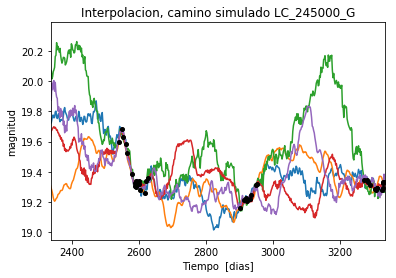

In [14]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_245000_G')

In [15]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [16]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 573.230458267
Median: 0.014430334557
Standard deviation: 0.206494906927
68% credibility interval: [ 0.00136564  0.21339901]
95% credibility interval: [  3.96224434e-04   8.15225452e-01]
99% credibility interval: [  3.24256003e-04   1.00064779e+00]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 582.081795807
Median: 0.00684123332561
Standard deviation: 0.134808385245
68% credibility interval: [ 0.00067601  0.07455023]
95% credibility interval: [  3.32721435e-04   4.97626923e-01]
99% credibility interval: [  3.05395657e-04   9.18697509e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 484.193868748
Median: 0.0344754373434
S

In [17]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 447.885878886
Median: 109.335338247
Standard deviation: 2.21061461927
68% credibility interval: [ 107.15848647  111.03617775]
95% credibility interval: [ 104.12026358  113.53483611]
99% credibility interval: [ 102.00852535  114.48474133]


In [18]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 594.938162149
Median: 0.520885369986
Standard deviation: 2.62463786972
68% credibility interval: [ 0.14109201  4.40283869]
95% credibility interval: [ 0.05660336  9.17814687]
99% credibility interval: [  0.03258953  12.51516191]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 367.646984773
Median: 3.07278289962
Standard deviation: 12.7657290823
68% credibility interval: [  0.60893054  18.8802113 ]
95% credibility interval: [  0.06674985

In [19]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 15654.3049193
Median: 4.67970328332e-37
Standard deviation: 6.33707746206e+98
68% credibility interval: [  2.22343951e-73   4.31130118e-08]
95% credibility interval: [  1.25214917e-126   1.18155761e+001]
99% credibility interval: [  8.53727414e-133   2.12357059e+083]


In [20]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1261.64296732
Median: 19.5885670597
Standard deviation: 0.168997319922
68% credibility interval: [ 19.42876464  19.74139011]
95% credibility interval: [ 19.25711406  19.91673551]
99% credibility interval: [ 19.10604334  20.09177466]


In [21]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 180.695646305
Median: 0.199645571771
Standard deviation: 0.28269966353
68% credibility interval: [ 0.          0.63613544]
95% credibility interval: [ 0.          0.95178933]
99% credibility interval: [ 0.          1.04392815]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 180.695646305
Median: 0.199645571771
Standard deviation: 0.28269966353
68% credibility interval: [ 0.          0.63613544]
95% credibility interval: [ 0.          0.95178933]
99% credibility interval: [ 0.          1.04392815]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 7536.18004292
Median: 0.0
Standard deviation: 0.000253670689213
68% credib

In [22]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 447.885878886
Median: 109.335338247
Standard deviation: 2.21061461927
68% credibility interval: [ 107.15848647  111.03617775]
95% credibility interval: [ 104.12026358  113.53483611]
99% credibility interval: [ 102.00852535  114.48474133]


In [23]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1986.88734452
Median: 0.112449881913
Standard deviation: 0.0688706969655
68% credibility interval: [ 0.07830645  0.17644168]
95% credibility interval: [ 0.05611174  0.30664554]
99% credibility interval: [ 0.04744737  0.4741843 ]


In [24]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1571.70758983
Median: 1.15267002146
Standard deviation: 0.248104863813
68% credibility interval: [ 0.9375954   1.43169663]
95% credibility interval: [ 0.75865616  1.7189039 ]
99% credibility interval: [ 0.6778317   1.89099942]


In [25]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 494.293517462
Median: 0.0132537500166
Standard deviation: 0.33650984226
68% credibility interval: [ 0.0016787   0.10587229]
95% credibility interval: [  6.89289054e-05   9.28399115e-01]
99% credibility interval: [  1.09675313e-86   2.26657666e+00]


In [26]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 573.230458267
Median: (-0.0906684660665-1.49372024915j)
Standard deviation: 2.19964658719
68% credibility interval: [-1.34082553-4.70966005j -0.00858055-2.88349246j]
95% credibility interval: [ -5.12221258e+00+0.j          -2.48955154e-03-5.04456809j]
99% credibility interval: [ -6.28725547e+00+0.j          -2.03736056e-03-5.47744022j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 582.081795807
Median: (-0.0429847367145+2.67420159896j)
Standard deviation: 1.9678751867
68% credibility interval: [-0.46841289+0.j       -0.00424751+0.262663j]
95% credibility interval: [ -3.12668217e+00+2.89103607j  -2.09055043e-03+0.j        ]
99% credibility interval: [ -5.77234669e+00+3.20453627j  -1.91885750e-03+0.j        ]
Posterior